###PART 4
####Problem Statement: School District with Higher Average Math Score in Grade 6 in 2006 SHOULD have a higher SAT Score
#####NULL HYPOTHESIS: SAT Scores of  Students in NYC School District(1-32)  has NO Correlation to Average Math Score in Grade 6 in 2006  in NYC School District(1-32)
#####ALTERNATE HYPOTHESIS: SAT Scores of  Students in NYC School District(1-32)  has POSITIVE Correlation to Average Math Score in Grade 6 in 2006  in NYC School District(1-32)

In [1]:
#Importing Packages
import csv
import urllib2
import os
import pylab as pl
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline 

# IMPORTING THE FILE FOR SAT SCORES FOR 2012
SAT_Score = pd.read_csv("https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD")


Populating the interactive namespace from numpy and matplotlib


In [2]:
SAT_Score.replace('s','NaN', inplace=True, regex=True)
SAT_Score = SAT_Score.dropna()

In [3]:
SAT_Score['District'] = SAT_Score['DBN'].map(lambda x: str(x)[:2])
SAT_Score['District'] = (SAT_Score['District']).astype(float)
# SAT_Score['SAT_avg_reading'] = (SAT_Score['SAT Critical Reading Avg. Score']).astype(float)
# SAT_Score['SAT_avg_writing'] = (SAT_Score['SAT Writing Avg. Score']).astype(float)
SAT_Score['SAT_avg_math'] = (SAT_Score['SAT Math Avg. Score']).astype(float)

SAT_Score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 8 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
District                           478 non-null float64
SAT_avg_math                       421 non-null float64
dtypes: float64(2), object(6)
memory usage: 33.6+ KB


In [4]:
SAT_Score = SAT_Score.groupby('District').mean()

In [5]:
SAT_Score = SAT_Score.reset_index()
SAT_Score = SAT_Score [0:32]

In [6]:
SAT_Score.head(3)

,District,SAT_avg_math
0,1,468.444444
1,2,441.344828
2,3,426.000000


In [7]:
# SAT_Score['Total_Score'] = pd.DataFrame(SAT_Score['SAT_avg_reading'] + SAT_Score['SAT_avg_writing'] +
#                                         SAT_Score['SAT_avg_math'])

In [8]:
SAT_Score.head(3)

,District,SAT_avg_math
0,1,468.444444
1,2,441.344828
2,3,426.000000


In [9]:
math_score = pd.read_csv('https://data.cityofnewyork.us/api/views/gyaz-82xj/rows.csv?accessType=DOWNLOAD')
math_score.info()
math_score.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 0 to 1343
Data columns (total 16 columns):
District            1344 non-null int64
Grade               1344 non-null object
Year                1344 non-null int64
Category            1344 non-null object
Number Tested       1344 non-null int64
Mean Scale Score    1344 non-null int64
Level 1 #           1344 non-null int64
Level 1 %           1344 non-null object
Level 2 #           1344 non-null int64
Level 2 %           1344 non-null object
Level 3 #           1344 non-null int64
Level 3 %           1344 non-null object
Level 4 #           1344 non-null int64
Level 4 %           1344 non-null object
Level 3+4 #         1344 non-null int64
Level 3+4 %         1344 non-null object
dtypes: int64(9), object(7)
memory usage: 178.5+ KB


,District,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,1,3,2006,All Students,936,673,73,7.8%,170,18.2%,484,51.7%,209,22.3%,693,74%
1,1,3,2007,All Students,836,679,48,5.7%,86,10.3%,511,61.1%,191,22.8%,702,84%
2,1,3,2008,All Students,862,686,17,2%,94,10.9%,537,62.3%,214,24.8%,751,87.1%


In [10]:
mth_score = math_score.groupby(['District' , 'Grade' , 'Year']).mean()
mth_score_reset = mth_score.reset_index()
# math_score_by_district = mth_score_reset.groupby(['District']).mean()
# math_score_by_district_reset = math_score_by_district.reset_index()
mth_score_2006 = mth_score_reset[(mth_score_reset.Grade == '6') & (mth_score_reset.Year== 2006)]
# eng_scr = eng_scr.reset_index()
mth_score_2006.head(3)

,District,Grade,Year,Number Tested,Mean Scale Score,Level 1 #,Level 2 #,Level 3 #,Level 4 #,Level 3+4 #
18,1,6,2006,912,659,116,248,392,156,548
60,2,6,2006,2218,671,177,382,1118,541,1659
102,3,6,2006,1501,657,245,407,582,267,849


In [11]:
mth_score_2006['District'] = mth_score_2006['District'].astype(float)
mth_score_2006.head(3)

C:\Users\Anita_2\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,District,Grade,Year,Number Tested,Mean Scale Score,Level 1 #,Level 2 #,Level 3 #,Level 4 #,Level 3+4 #
18,1,6,2006,912,659,116,248,392,156,548
60,2,6,2006,2218,671,177,382,1118,541,1659
102,3,6,2006,1501,657,245,407,582,267,849


In [12]:
SAT_math_vs_2006 = pd.merge(SAT_Score, mth_score_2006, how='inner', on='District')
SAT_math_vs_2006.columns
SAT_math_vs_2006.info()
SAT_math_vs_2006.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 11 columns):
District            32 non-null float64
SAT_avg_math        32 non-null float64
Grade               32 non-null object
Year                32 non-null int64
Number Tested       32 non-null int64
Mean Scale Score    32 non-null int64
Level 1 #           32 non-null int64
Level 2 #           32 non-null int64
Level 3 #           32 non-null int64
Level 4 #           32 non-null int64
Level 3+4 #         32 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 3.0+ KB


,District,SAT_avg_math,Grade,Year,Number Tested,Mean Scale Score,Level 1 #,Level 2 #,Level 3 #,Level 4 #,Level 3+4 #
0,1,468.444444,6,2006,912,659,116,248,392,156,548
1,2,441.344828,6,2006,2218,671,177,382,1118,541,1659
2,3,426.000000,6,2006,1501,657,245,407,582,267,849


In [14]:
#Setting X and Y variables
Score_2006 = SAT_math_vs_2006['Mean Scale Score']
Score_2012 = SAT_math_vs_2006['SAT_avg_math']

# Fitting linear regression model 
model_SAT_math_2006 = smf.ols(formula='(Score_2012) ~ (Score_2006) ' , data= SAT_math_vs_2006).fit()
model_SAT_math_2006.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Score_2012   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     53.21
Date:                Mon, 14 Dec 2015   Prob (F-statistic):           4.02e-08
Time:                        18:55:41   Log-Likelihood:                -144.78
No. Observations:                  32   AIC:                             293.6
Df Residuals:                      30   BIC:                             296.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -966.8711    189.534     -5.101      0.000     -1353.952  -579.790
Score_2006     2.1278      0.292      7.294      0.000         1.532     2.724
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   2.803
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.621
Skew:                           0.296   Prob(JB):                        0.445
Kurtosis:                       2.070   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square for 1st degree linear regression is 0.639, The model is predicting the real data at 63.9%. For 1unit increase in attendance rate the SAT score increase by 2.13units. The P>|t| is less than 0.05 therefore we can reject the hypothesis that the two values are not correlated.

In [15]:

# Fitting a second degree curve linear regression model
model2_SAT_math_2006 = smf.ols(formula='(Score_2012) ~ (Score_2006) + I(Score_2006**2)', data= SAT_math_vs_2006).fit()
model2_SAT_math_2006.summary()
# print "R-squared value for Class Size vs Total Score:", model2_SAT_math_2006.rsquared
# print model2_SAT_math_2006.params
# print model2_SAT_math_2006.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Score_2012   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     25.72
Date:                Mon, 14 Dec 2015   Prob (F-statistic):           3.77e-07
Time:                        18:57:44   Log-Likelihood:                -144.78
No. Observations:                  32   AIC:                             295.6
Df Residuals:                      29   BIC:                             300.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept          -1087.4436   7531.689     -0.144      0.886     -1.65e+04  1.43e+04
Score_2006             2.4972     23.071      0.108      0.915       -44.688    49.682
I(Score_2006 ** 2)    -0.0003      0.018     -0.016      0.987        -0.036     0.036
==============================================================================
Omnibus:                        2.641   Durbin-Watson:                   2.803
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                1.618
Skew:                           0.293   Prob(JB):                        0.445
Kurtosis:                       2.067   Cond. No.                     7.68e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square for 2nd degree linear regression is 0.639, The model is predicting the real data at 63.9%. Since the R-squared value is very similar for 1st Degree and 2nd Degree we cannot predict which model is a better, we will try visual Inspection.

626 684


(625, 685)

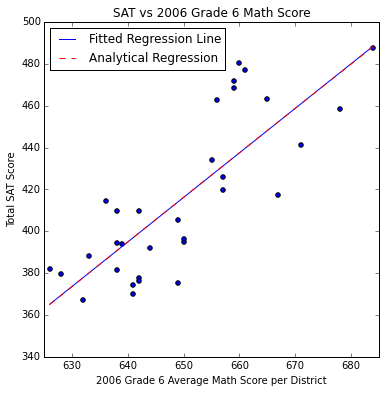

In [18]:

# Using limit values for linspace function
lower1 = np.min(Score_2006)
upper1 = np.max(Score_2006)
print lower1 , upper1

# Generating predicted values using the above model1 parameters
x_dummy = pd.DataFrame({'Score_2006': np.linspace(lower1, upper1, 50)})
predicted_model = model_SAT_math_2006.predict(x_dummy)


# # Generating predicted values using the above model2 parameters
# x2_dummy = pd.DataFrame({'Score_2006': np.linspace(lower1, upper1, 10)})
predicted2_model = model2_SAT_math_2006.predict(x_dummy)

pl.figure(figsize=(6, 6))
pl.title('SAT vs 2006 Grade 6 Math Score')
pl.xlabel('2006 Grade 6 Average Math Score per District')
pl.ylabel('Total SAT Score')
pl.scatter(Score_2006,Score_2012)
pl.plot(x_dummy, predicted_model, 'b', label="Fitted Regression Line", linestyle='-')
pl.plot(x_dummy,predicted2_model, 'r', linestyle='--', label = "Analytical Regression")
pl.legend(loc="upper left")
pl.xlim(int(lower1-1) , int(upper1+1))

In [ ]:

# Using limit values for linspace function
lower1 = np.min(Score_2006)
upper1 = np.max(Score_2006)
print lower1 , upper1

# Generating predicted values using the above model1 parameters
x_dummy = pd.DataFrame({'Score_2006': np.linspace(lower1, upper1, 50)})
predicted_model = model_SAT_math_2006.predict(x_dummy)

# Fitting a second degree curve linear regression model
model2_SAT_math_2006 = smf.ols(formula='(Score_2012) ~ (Score_2006) + I(Score_2006**2)', data= SAT_math_vs_2006).fit()
# print "R-squared value for Class Size vs Total Score:", model2_SAT_math_2006.rsquared
# print model2_SAT_math_2006.params
# print model2_SAT_math_2006.summary()

# # Generating predicted values using the above model2 parameters
# x2_dummy = pd.DataFrame({'Score_2006': np.linspace(lower1, upper1, 10)})
predicted2_model = model2_SAT_math_2006.predict(x_dummy)

In [19]:
print "R-squared value for 1st Degree Linear Regression Grade 6 Math Score vs SAT Reading + writing Score:", model_SAT_math_2006.rsquared
print "R-squared value for 2nd Degree Linear Regression Grade 6 Math Score vs SAT Reading + writing Score:", model2_SAT_math_2006.rsquared

R-squared value for 1st Degree Linear Regression Grade 6 Math Score vs SAT Reading + writing Score: 0.639449209302
R-squared value for 2nd Degree Linear Regression Grade 6 Math Score vs SAT Reading + writing Score: 0.639452397615


In [20]:
#LIKELIHOOD RATIO TEST 
model2_SAT_math_2006.compare_lr_test(model_SAT_math_2006)

(0.00028297391725118359, 0.98657875566024955, 1.0)

Since the ratio I have gotten (0.00028) is lower than the chi square value (3.84 for a significance level of 0.05) I can accept the null hypothesis. Therefore, Line model is better than curve model.